# Grouping modules by T1D progression categories (P, M, R)

This notebook extract top LV from differentially expressed genes in P, M, R groups

Sakaiza Rasolofomanana Rajery

12/19/2024

# load packages

In [19]:
library(tidyverse, warn.conflicts=FALSE)
library(reticulate)
library("ggpubr")

# load data: RNA_seq_projection, RNA_pheno_file,

### RNA_pheno_file

In [20]:
# path to rna dataset
path_to_rna <- "/Users/rasolofs/Library/CloudStorage/OneDrive-TheUniversityofColoradoDenver/DAISY RNA Phenoplier"
RNA_pheno <- read_csv(paste0(path_to_rna,"/DAISY_RNASeq_Phenotype_Deidentified.csv"), col_types = cols())
dim(RNA_pheno)
head(RNA_pheno,5)

[1] 136  22

ID      Group      Freezer_Time Female_YN Multiple_DAISY_Baseline S_W      
1 00041-0 Maintainer 11.6797      0         0                       0.7595215
2 00110-0 Reverter   10.2533      0         0                       0.8285043
3 00139-0 Reverter    8.0958      1         0                       1.2423768
4 00159-0 Maintainer 10.2587      1         0                       0.7426269
5 00174-0 Progressor  4.7420      0         0                       1.2078117
  NHW_YN dr34_YN FDR_YN Age     ⋯ PC1     PC2     PC3    PC4     PC5    
1 1      1       1      17.1307 ⋯ -0.0067 -0.0068 0.0137 -0.0646  0.0774
2 1      0       1      16.5147 ⋯ -0.0241  0.0202 0.0288 -0.0130 -0.0043
3 1      0       1      20.2026 ⋯ -0.0266  0.0165 0.0110 -0.0258 -0.0262
4 1      0       1      15.0664 ⋯ -0.0212  0.0141 0.0175  0.0184 -0.0315
5 1      0       1      15.7782 ⋯  0.0049  0.0110 0.0058  0.0759  0.0029
  PC6     PC7     PC8     PC9     PC10   
1 -0.0040 -0.0006 -0.1208 -0.0602  0.0387
2 -0.0021  0.0049 -0.0195  0.0382 -0.0268
3 -0.0255  0.0011 -0.0085  0.0179 -0.0127
4  0.0144 -0.0265  0.0290  0.0285 -0.0546
5 -0.0036  0.0014 -0.0046 -0.0043 -0.0068

## RNA_seq_projection 

In [21]:
RNA_proj <- readRDS("output/projection_1.rds")
dim(RNA_proj)
head(RNA_proj,5)

[1] 987 136

00041-0      00110-0    
1,REACTOME_MRNA_SPLICING                          0.045748028 -0.08426191
2,SVM Monocytes                                   0.104307804  0.02627734
3,REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES -0.034338781 -0.02141530
4,REACTOME_NEURONAL_SYSTEM                        0.056377294  0.04507367
LV 5                                             -0.006014439  0.00770212
                                                 00139-0     00159-0    
1,REACTOME_MRNA_SPLICING                         -0.07769718 -0.07853920
2,SVM Monocytes                                  -0.04991374  0.26645777
3,REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES -0.10229196 -0.00426107
4,REACTOME_NEURONAL_SYSTEM                        0.09735670  0.04125927
LV 5                                             -0.02353528  0.01078596
                                                 00174-0      00177-0    
1,REACTOME_MRNA_SPLICING                          0.022015152  0.11490328
2,SVM Monocytes                                  -0.008530261 -0.04828302
3,REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES -0.006897807  0.04363627
4,REACTOME_NEURONAL_SYSTEM                        0.027453577 -0.04137032
LV 5                                              0.017448294 -0.06000165
                                                 00181-0     00234-0      
1,REACTOME_MRNA_SPLICING                          0.03391685 -0.0007790358
2,SVM Monocytes                                  -0.05243688 -0.0500619312
3,REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES -0.04180781  0.0247366996
4,REACTOME_NEURONAL_SYSTEM                        0.04911046  0.0497693154
LV 5                                             -0.01973003  0.0274240952
                                                 00250-0      00266-0      ⋯
1,REACTOME_MRNA_SPLICING                         -0.055053849  0.307223472 ⋯
2,SVM Monocytes                                   0.101488183 -0.106715583 ⋯
3,REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES  0.003378116 -0.040374505 ⋯
4,REACTOME_NEURONAL_SYSTEM                        0.049814132 -0.022980039 ⋯
LV 5                                              0.075357870  0.002400883 ⋯
                                                 39376-0      39390-0    
1,REACTOME_MRNA_SPLICING                         -0.020805125 0.200051932
2,SVM Monocytes                                  -0.110671875 0.097926147
3,REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES -0.003532239 0.025953059
4,REACTOME_NEURONAL_SYSTEM                        0.010174065 0.008385931
LV 5                                              0.006542319 0.012716513
                                                 50136-0      62291-0      
1,REACTOME_MRNA_SPLICING                          0.074535767  0.0790468803
2,SVM Monocytes                                  -0.042016000 -0.0271421926
3,REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES -0.032198235  0.0007537681
4,REACTOME_NEURONAL_SYSTEM                       -0.020210141 -0.1275247825
LV 5                                             -0.007183371  0.0320062254
                                                 81801-0      84002-0    
1,REACTOME_MRNA_SPLICING                         -0.116613355 -0.02416923
2,SVM Monocytes                                   0.084166292  0.10209373
3,REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES -0.027967879  0.02562363
4,REACTOME_NEURONAL_SYSTEM                        0.049648173  0.01238279
LV 5                                             -0.006807858 -0.01310825
                                                 84689-0     84731-0    
1,REACTOME_MRNA_SPLICING                         -0.02599850  0.03331409
2,SVM Monocytes                                   0.02434837 -0.03841368
3,REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES -0.10518150 -0.02992770
4,REACTOME_NEURONAL_SYSTEM                        0.05540130  0.03620698
LV 5                                              0.02927054 -0.02252472
                             

In [41]:
RNA_proj_t <- data.frame(t(RNA_proj))
LV_col <- colnames(RNA_proj_t)
length(LV_col)

[1] 987

In [43]:
# convert matrix to dataframe with gene as rownames
RNA_proj_t <- cbind(ID = colnames(RNA_proj), t(RNA_proj))
# merge dataframe with 'name_to_ID' (file containing name and ensembleID) by gene
RNA_proj_group <- merge(RNA_proj_t, RNA_pheno[,1:2], by = "ID")
#set rownames of new dataframe to ensembleID
#rownames(EnsID_df) <- EnsID_df$EnsemblID
#remove gene and ensembleID column
#z_matrix <- as.matrix(EnsID_df[, !(colnames(EnsID_df) %in% c("gene", "EnsemblID"))])

colnames(RNA_proj_group)[2:988] <- LV_col
#this <- RNA_proj_group[,LV_col]
RNA_proj_group[,LV_col] <- sapply(RNA_proj_group[,LV_col], function(x) as.numeric(as.character(x)))

                                  

In [44]:
head(RNA_proj_group,5)
RNA_proj_group$Group <- ordered(RNA_proj_group$Group,
                         levels = c("Maintainer", "Reverter", "Progressor"))

ID      X1.REACTOME_MRNA_SPLICING X2.SVM.Monocytes
1 00041-0  0.04574803                0.104307804    
2 00110-0 -0.08426191                0.026277343    
3 00139-0 -0.07769718               -0.049913741    
4 00159-0 -0.07853920                0.266457766    
5 00174-0  0.02201515               -0.008530261    
  X3.REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES X4.REACTOME_NEURONAL_SYSTEM
1 -0.034338781                                      0.05637729                 
2 -0.021415299                                      0.04507367                 
3 -0.102291965                                      0.09735670                 
4 -0.004261070                                      0.04125927                 
5 -0.006897807                                      0.02745358                 
  LV.5         LV.6         X7.IRIS_Neutrophil.Resting
1 -0.006014439  0.013141592 -0.15869934               
2  0.007702120  0.040915288  0.06129902               
3 -0.023535277  0.033234436 -0.06710881               
4  0.010785959 -0.026479309  0.04325244               
5  0.017448294 -0.004379551 -0.08090162               
  X8.KEGG_PPAR_SIGNALING_PATHWAY LV.9        ⋯ LV.979       LV.980      
1 -0.014859012                   -0.03240155 ⋯  0.034137770  0.036996881
2  0.032181881                   -0.08186520 ⋯ -0.008798991 -0.005897529
3  0.008868332                   -0.08689146 ⋯  0.004060664  0.012191500
4  0.005756415                   -0.02808686 ⋯  0.016373535  0.006476112
5 -0.007961799                   -0.01346758 ⋯ -0.003171649 -0.009250876
  LV.981       LV.982        LV.983       LV.984     
1  0.039953190  0.0001208903  0.008096008 -0.28650232
2 -0.023566109 -0.0156890102 -0.030152906 -0.47237525
3  0.008133505  0.0115797178  0.007200402 -0.01228895
4  0.025129735  0.0283485458 -0.022585673 -0.36083597
5  0.007137157 -0.0076687468  0.021669337  0.01658212
  X985.IRIS_Neutrophil.Resting LV.986       LV.987      Group     
1 -0.16010377                  -0.016496984 -0.01857530 Maintainer
2  0.16645707                   0.005320207  0.04090875 Reverter  
3  0.16295813                   0.020930740  0.02287022 Reverter  
4  0.18419112                  -0.050503989  0.03623584 Maintainer
5 -0.01654707                  -0.009357040 -0.02263874 Progressor

In [54]:
to_plot <-RNA_proj_group[,c("Group","LV.986")] 

head(to_plot, 136)

Group      LV.986       
1   Maintainer -0.016496984 
2   Reverter    0.005320207 
3   Reverter    0.020930740 
4   Maintainer -0.050503989 
5   Progressor -0.009357040 
6   Reverter    0.021209632 
7   Maintainer  0.038869057 
8   Maintainer  0.029849840 
9   Maintainer  0.021187604 
10  Maintainer  0.011452913 
11  Reverter   -0.010114043 
12  Progressor -0.025142746 
13  Maintainer -0.003733407 
14  Reverter   -0.071244959 
15  Progressor -0.049296691 
16  Maintainer  0.024943052 
17  Maintainer  0.055938107 
18  Reverter    0.003736546 
19  Progressor  0.034420302 
20  Reverter    0.052458634 
21  Maintainer -0.011636061 
22  Reverter    0.007345999 
23  Reverter   -0.003028695 
24  Maintainer -0.006881770 
25  Progressor -0.025828919 
26  Reverter   -0.033913462 
27  Reverter   -0.009607173 
28  Maintainer -0.022952160 
29  Maintainer  0.003926910 
30  Progressor  0.035684161 
⋮   ⋮          ⋮            
107 Progressor  0.0066761524
108 Maintainer  0.0132581112
109 Reverter    0.0123933083
110 Maintainer  0.0219101829
111 Maintainer  0.0004094050
112 Reverter    0.0056224273
113 Maintainer -0.0183835639
114 Progressor  0.0099318896
115 Progressor  0.0286542576
116 Reverter    0.0315524672
117 Progressor  0.0008870014
118 Reverter    0.0034499586
119 Reverter   -0.0044147001
120 Progressor -0.0294122416
121 Maintainer  0.0215216076
122 Maintainer  0.0008432097
123 Progressor  0.0300548358
124 Maintainer -0.0065439058
125 Maintainer -0.0404527558
126 Progressor -0.0171473833
127 Reverter   -0.0189263547
128 Reverter   -0.0280008843
129 Reverter   -0.0178560002
130 Reverter    0.0279589719
131 Reverter    0.0254749217
132 Progressor -0.0168135312
133 Reverter    0.0192029608
134 Reverter    0.0174576131
135 Progressor  0.0072680145
136 Maintainer -0.0221037737

[1] "Group"  "LV.986"

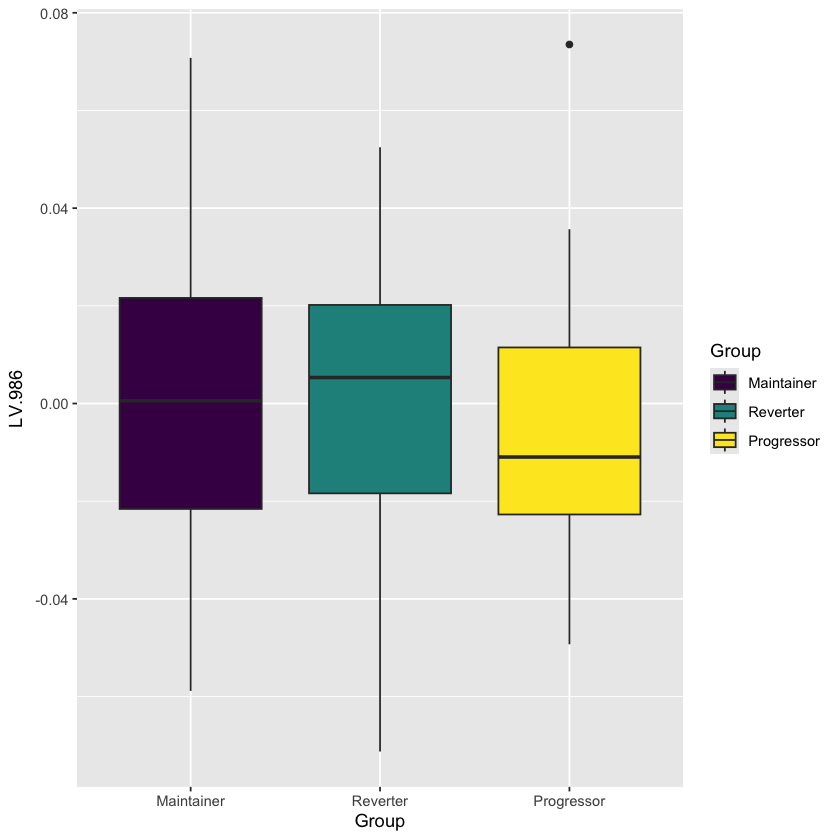

In [57]:
colnames(to_plot)

ggplot(to_plot, aes(x=Group, y=LV.986, fill=Group)) + 
  geom_boxplot()

In [ ]:
res.aov <- aov(`LV 986` ~ Group, data = RNA_proj_group)

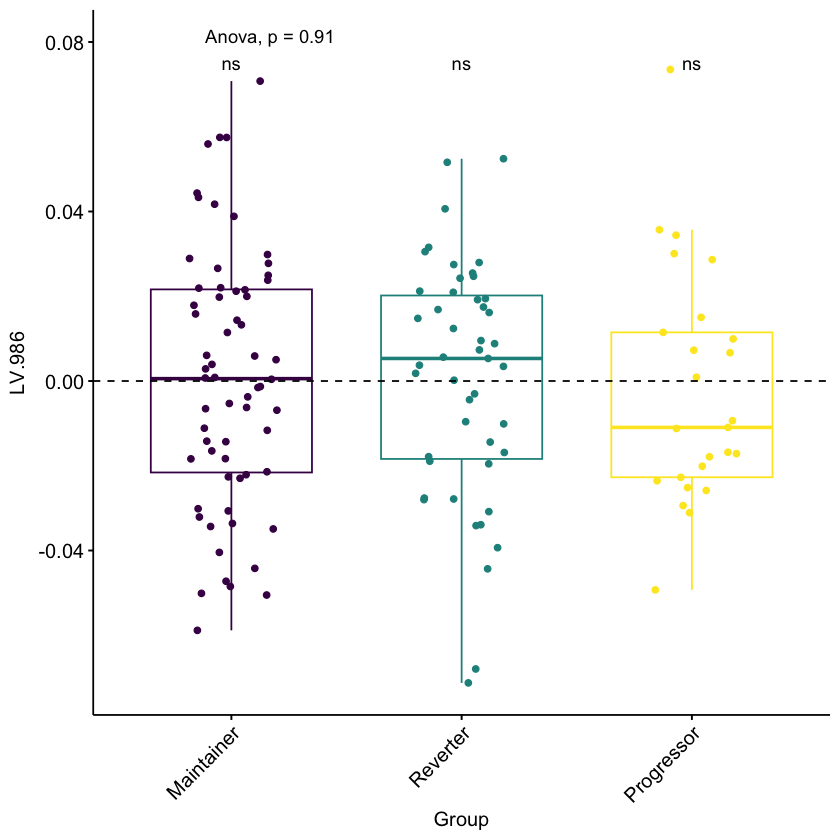

In [59]:
ggboxplot(to_plot, x = "Group", y = "LV.986", color = "Group", 
          add = "jitter", legend = "none") +
  rotate_x_text(angle = 45)+
  geom_hline(yintercept = mean(to_plot$LV.986), linetype = 2)+ # Add horizontal line at base mean
  stat_compare_means(method = "anova", label.y = 0.08)+        # Add global annova p-value
  stat_compare_means(label = "p.signif", method = "t.test",
                     ref.group = ".all.")  

In [78]:
res <- data.frame(matrix(nrow = 0, ncol = 8))

for (i in 1:length(LV_col)){
    comp_i <- compare_means(as.formula(paste0(LV_col[i]," ~ Group")),  data = RNA_proj_group,
              ref.group = ".all.", method = "t.test")
    res <- rbind(res, comp_i)
    }



In [80]:
res_formated <- res[,c(1,3,4)]

In [85]:
colnames(res_formated) <- c("LV","Group","p_val")

In [91]:
res_formated_wider <- pivot_wider(data = res_formated, id_cols = "LV",names_from = "Group" ,values_from =  "p_val",names_prefix = "p_val_")
head(res_formated_wider,5)

LV                                                p_val_Maintainer
1 X1.REACTOME_MRNA_SPLICING                         0.8070972       
2 X2.SVM.Monocytes                                  0.3756811       
3 X3.REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES 0.4837050       
4 X4.REACTOME_NEURONAL_SYSTEM                       0.8950174       
5 LV.5                                              0.5652165       
  p_val_Reverter p_val_Progressor
1 0.8836280      0.5028743       
2 0.6657942      0.3295037       
3 0.3869241      0.7410529       
4 0.6761428      0.6853268       
5 0.9999818      0.2927908

In [89]:
dim(res_formated_wider)

[1] 987   4